In [1]:
%pip install -q matplotlib numpy scikit-learn
%pip install -q torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importações

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
import numpy as np

# Gerar o conjunto de dados sintético


In [5]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=1,  # Apenas 1 característica informativa
    n_redundant=0,  # Nenhuma característica redundante
    n_repeated=0,  # Nenhuma característica repetida
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
)

Visualizando os dados

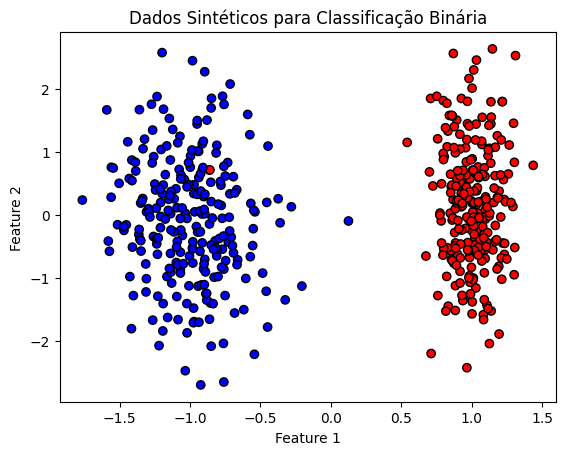

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dados Sintéticos para Classificação Binária')
plt.show()

# Dividir os dados em treino e teste

In [7]:
test_size = 0.3
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size,
    random_state=random_state
)

Visualizando os dados de treino e teste

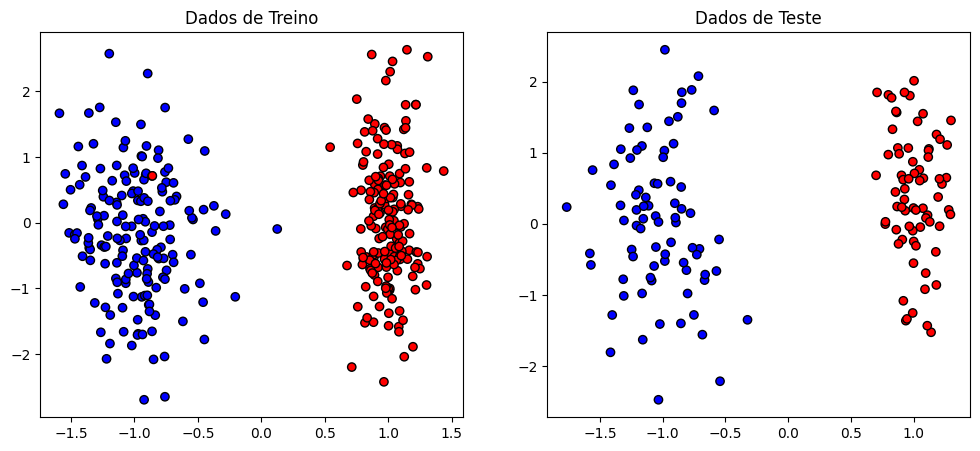

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title('Dados de Treino')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.title('Dados de Teste')

plt.show()

# Modelo de regressão logística


## Convertendo os dados para tensores do PyTorch

In [9]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

## Definindo o modelo de regressão logística

In [10]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


## Instanciando o modelo e definindo a função de perda e otimizador

In [11]:
model = LogisticRegression(input_dim=2) # 2 features
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent

## Treinamento com gradiente descendente não-estocástico

In [12]:
num_epochs = 1000

model.train() 
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1327
Epoch [200/1000], Loss: 0.0768
Epoch [300/1000], Loss: 0.0576
Epoch [400/1000], Loss: 0.0480
Epoch [500/1000], Loss: 0.0422
Epoch [600/1000], Loss: 0.0384
Epoch [700/1000], Loss: 0.0357
Epoch [800/1000], Loss: 0.0337
Epoch [900/1000], Loss: 0.0322
Epoch [1000/1000], Loss: 0.0309


## Avaliar a acurácia e visualizar a fronteira de decisão

Fazendo previsões no conjunto de teste

In [13]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)


In [14]:
from utils import accuracy

acc = accuracy(y_test_tensor, y_pred_test)
print(f'Acurácia no conjunto de teste: {acc.item() * 100:.2f}%')

Acurácia no conjunto de teste: 100.00%


Plotando a fronteira de decisão

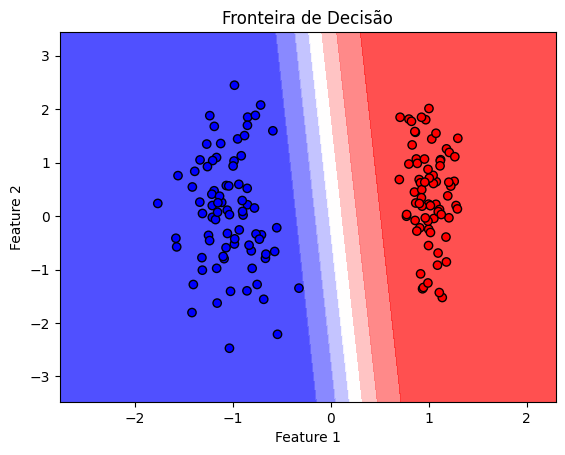

In [15]:
from utils import plot_decision_boundary

plot_decision_boundary(model, X_test, y_test)